1. Realizar un analisis exploratorio de los datos para identificar relaciones entre variables, valores atipicos, tendencias, etc.

In [1]:
# Cargar las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

In [2]:
#Lectura de datos en Python y se carga en la variable datos

Datos = pd.read_csv('.\Titanic-Dataset.csv')

In [3]:
#Realizamos lectura de datos para el analisis exploratorio

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Descripción de los datos

Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

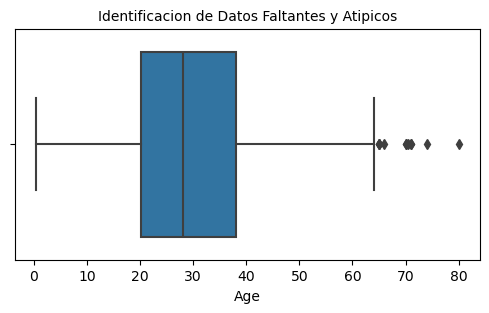

In [5]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

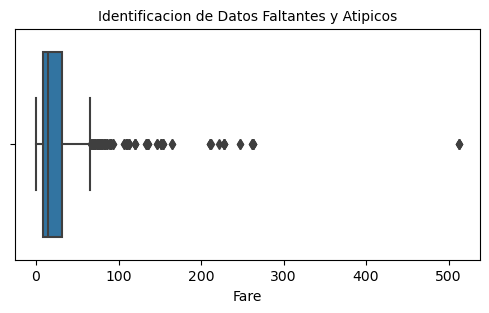

In [6]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [7]:
#Revisión de datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Completamos los datos faltantes en la columna "Age" con el promedio de la misma columna

Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())

In [9]:
#Revisión de datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Eliminamos las columnas "Cabin", "PassengerId", "Name" y "Ticket" ya que no se necesitan

Datos.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [11]:
#Revisamos las columnas que quedan

Datos.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
#Convertimos las columnas "Sex" y "Embarked" en valores numericos

label_encoder = LabelEncoder()
Datos['Sex'] = label_encoder.fit_transform(Datos['Sex'])
Datos['Embarked'] = label_encoder.fit_transform(Datos['Embarked'])

In [13]:
#Revisamos los datos cambiados, todos deben ser valores numéricos

Datos

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristica de interes:

Sobreviviente: Si la persona sobrevive al hundimiento del Titanic o no (0 = No Sobrevive - 1 = Sobrevive)

Predecir si una persona sobrevive o no al Titanic

In [14]:
#Total de personas sobrevivientes al Titanic

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [16]:
#Porcentaje de datos para entrenamiento (train) = 80%, y para prueba (test) = 20%

#Se crean variables X y Y para almacenar la información del entrenamiento

X=Datos.drop('Survived',axis=1)
Y=Datos['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [17]:
print (X_train)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
502       3    0  29.699118      0      0   7.6292         1
464       3    1  29.699118      0      0   8.0500         2
198       3    0  29.699118      0      0   7.7500         1
765       1    0  51.000000      1      0  77.9583         2
421       3    1  21.000000      0      0   7.7333         1
..      ...  ...        ...    ...    ...      ...       ...
131       3    1  20.000000      0      0   7.0500         2
490       3    1  29.699118      1      0  19.9667         2
528       3    1  39.000000      0      0   7.9250         2
48        3    1  29.699118      2      0  21.6792         0
80        3    1  22.000000      0      0   9.0000         2

[712 rows x 7 columns]


In [18]:
print (Y_train)

502    0
464    0
198    1
765    1
421    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 712, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [19]:
#Construir el modelo de regresión logistica

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de predicción

Prediccion = modelo_regresion.predict(X_test)

In [20]:
print(Y_test)

153    0
752    0
610    0
200    0
310    1
      ..
96     0
440    1
75     0
575    0
143    0
Name: Survived, Length: 179, dtype: int64


In [21]:
print(Prediccion)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-Score, etc

In [22]:
#Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

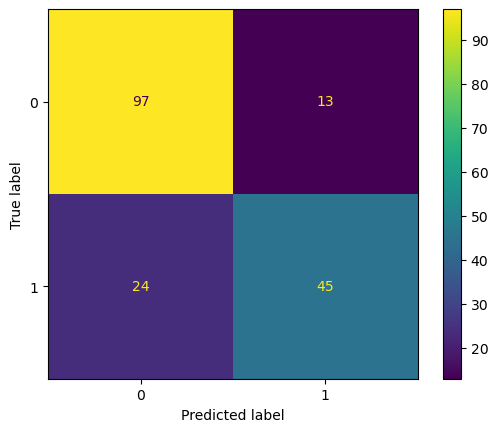

In [23]:
#Matriz de confusión del modelo

cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

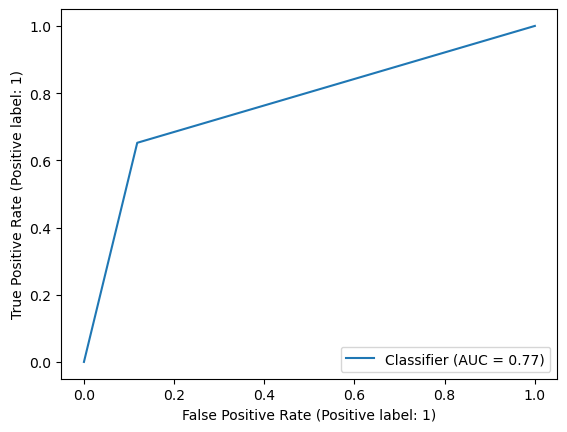

In [24]:
#Curva de precision del modelo

RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()